In [8]:
!pip install PyPDF2

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 5, in <module>
    from pip._internal.cli.main import main
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/cli/main.py", line 9, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/cli/autocompletion.py", line 10, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/cli/main_parser.py", line 8, in <module>
    from pip._internal.cli import cmdoptions
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/cli/cmdoptions.py", line 23, in <module>
    from pip._internal.cli.parser import ConfigOptionParser
  

In [ ]:
import pandas as pd
import numpy as np
import spacy
from spacy import displacy
import networkx as nx
import os
import PyPDF2

import matplotlib.pyplot as plt


In [ ]:
#loading the langage model in SpaCy
nlp = spacy.load('en_core_web_sm')

In [ ]:
#This is Spacy practice kidogoo
affirm = """My name is John Kinyanjui. I am learning  Machine Learning and 
hoping to be really good at it. Will be very good, actually. I am currently 
practising Natural Language Processing."""

affirm_doc = nlp(affirm)#returns a spaCy token
# affirm2 ='Mark Mungai Ng\'ang\'a is the best brother out here.\nOnly one actually.\nHehe'
# affirm_doc2 = nlp(affirm2)
# (affirm_doc2)

# affirm_doc
sentences = affirm_doc.sents
# entss = list(affirm_doc.sents)
for sent in sentences:
    print(sent.ents)
# for token in affirm_doc2:
#     if  not token.is_stop and not token.is_punct :
#         print(token)
# sentences

[John Kinyanjui]
[Machine Learning]
[]
[Natural Language Processing]


### Book Preparation

In [ ]:
!wget https://github.com/kinyanjjui/Network-Analysis-Outlander-Series/tree/main/Books

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
--2023-02-01 19:31:40--  https://github.com/kinyanjjui/Network-Analysis-Outlander-Series/tree/main/Books
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Books: No such file or directory

Cannot write to ‘Books’ (Success).


In [ ]:
#getting a list of directories containing the pdf files
book_dir =[bk for bk in os.scandir('Books') if '.pdf' in bk.name]#change to book_dir

#names of the files
# book_files =  [entry for entry in os.listdir('Books') if '.pdf' in entry]

#Trimming unnecessary parts of the pdf: Acknowledgements, Author's Notes
Trim_pages =[[8,378],[8,1058],[4,1235],[13,1326],[14,1657],[14,1681],[21,1413],[17,1238]]

#creating a dictionary containing the file directories with a list of start and end trim values
Book_trim = dict.fromkeys(book_dir)
i=0
for key in Book_trim.keys():
    Book_trim[key] = Trim_pages[i]
    i+=1
    
Book_trim

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-4260a5857de7>", line 2, in <module>
    book_dir =[bk for bk in os.scandir('Books') if '.pdf' in bk.name]#change to book_dir
FileNotFoundError: [Errno 2] No such file or directory: 'Books'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 2040, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'FileNotFoundError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_o

FileNotFoundError: ignored

In [ ]:
#write a function for converting pdf into the text files
def PdfConvert(pdf_dict):
    """Inputs : pdf_dict -- a dictionary with key values of 
    file directories and values of list containing the start and stop trim pages.
    
    Output: a text file in the data directory"""
    # open_pdf = open(f,'rb')
    for key in pdf_dict.keys():
        open_pdf = open(key.path,'rb')
        read_pdf= PyPDF2.PdfFileReader(open_pdf)#reading pdf using the filereader
        values = pdf_dict.get(key)
        # Page_count = read_pdf.numPages #getting number of pages in the pdf
        
        for i in range(values[0], values[1]):
            pageobj =read_pdf.getPage(i)
            pagecontent = pageobj.extractText()
            file_name = key.name.rstrip('.pdf')
            txt_file= open(f'data/{file_name}.txt',"a",encoding='utf-8')
            txt_file.writelines(pagecontent)
            txt_file.close() #closing the created text file
        
        open_pdf.close()
    

In [ ]:
# PdfConvert(Book_trim)

Loading Text Files

In [ ]:
all_books = [bk for bk in os.scandir('data') if '.txt' in bk.name]
voyager= all_books[2]
voyager

<DirEntry '3.Voyager.txt'>

In [ ]:
voyager_text = open(voyager, 'r',encoding='utf-8').read()
#applying the NER to the text
voyager_doc=nlp(voyager_text[:1000000])

In [ ]:
displacy.render(voyager_doc[:2000], style='ent',jupyter=True)

Character Handling

In [ ]:
character_df = pd.read_csv('characters_csv')
pd.set_option('display.max_rows', None)
# character_df

In [ ]:
#Creating a column with the character's firstname 
#but still retaining the honorifics

character_df['Char_firstname'] = character_df['Character'].apply(lambda x: x.split(' ', 1)[0] if not 'Mr' in x else x )
#write a function that preserves honorifics


In [ ]:
character_df

,Book,Character,Char_firstname
0,Outlander (novel),Alexander MacGregor,Alexander
1,Outlander (novel),Angus Mhor,Angus
3,Outlander (novel),Father Anselm,Father
4,Outlander (novel),Father Bain,Father
5,Outlander (novel),Mrs. Baird,Mrs. Baird
6,Outlander (novel),Corporal Hawkins,Corporal
7,Outlander (novel),Mrs. Crook,Mrs. Crook
8,Outlander (novel),Mr. Crook,Mr. Crook
9,Outlander (novel),Donas,Donas
10,Outlander (novel),Arthur Duncan,Arthur


Get Named Entity List per Sentence

In [ ]:
sent_ent_list = []

for sent in voyager_doc.sents:
    entity_list = [ent.text for ent in sent.ents]
    sent_ent_list.append({'sentence':sent,'entities':entity_list})
    
sent_entity_df = pd.DataFrame(sent_ent_list)

In [ ]:
pd.set_option('display.max_rows', 100,)
sent_entity_df


,sentence,entities
0,"(over, solid, earth, .)",[]
1,"(I, believed, it, was, an, opening, into, some...",[]
2,"(Sometimes, ,, seeing, the, tiny, ripples, cau...",[]
3,"(And, then, ,, looking, down, into, r, eflecti...",[]
4,"(If, I, stepped, in, ther, e, ,, I, would, dr,...",[]
...,...,...
12828,"(3, 3, \n, B, U, R, I)",[3 3]
12829,"(E, D, , T, R, E, A, S, U, R, E, \n , “, Y, o...",[]
12830,"(“, Oh, ,, aye, ?)",[]
12831,"(And, what, ’, s, one, of, those, ?, ”)",[]


In [ ]:
#filter out non-character entities
def filter_entity(entity_list, character_df):
    """Takes an entities pandas series and and a dataframe
    returns entities that match characters in the dataframe columns"""
    return [ent for ent in entity_list
    if ent in list(character_df['Character'])
    or ent in list(character_df['Char_firstname'])]

In [ ]:
sent_entity_df['character_entities'] = sent_entity_df['entities'].apply(lambda x: filter_entity(x,character_df))

In [ ]:
sent_entity_df_filt = sent_entity_df[sent_entity_df['character_entities'].map(len) > 0] 
#removing rows with empty entities

In [ ]:
sent_entity_df_filt.head()

,sentence,entities,character_entities
58,"(Jamie, made, a, fumbling, ef, fort, topush, t...","[Jamie, Randall’ s]",[Jamie]
74,"(Jamie, Fraser, !)",[Jamie Fraser],[Jamie Fraser]
88,"(Jamie, jerked, up, with, a, cry, of, revulsio...",[Jamie],[Jamie]
104,"(At, least, \n, when, he, was, fevered, ,, he,...",[Murtagh],[Murtagh]
106,"(Murtagh, was, dead, ;, he, knew, that, \n, mu...",[Murtagh],[Murtagh]


In [ ]:
#Taking only the first name of the characters
sent_entity_df_filt['character_entities'] = sent_entity_df_filt['character_entities'].apply(lambda x: [item.split()[0] for item in x]  )

C:\Users\ngang\AppData\Local\Temp\ipykernel_10636\2659811675.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filt['character_entities'] = sent_entity_df_filt['character_entities'].apply(lambda x: [item.split()[0] for item in x]  )


In [ ]:
pd.reset_option('^display.', silent=True)
sent_entity_df_filt

,sentence,entities,character_entities
58,"(Jamie, made, a, fumbling, ef, fort, topush, t...","[Jamie, Randall’ s]",[Jamie]
74,"(Jamie, Fraser, !)",[Jamie Fraser],[Jamie]
88,"(Jamie, jerked, up, with, a, cry, of, revulsio...",[Jamie],[Jamie]
104,"(At, least, \n, when, he, was, fevered, ,, he,...",[Murtagh],[Murtagh]
106,"(Murtagh, was, dead, ;, he, knew, that, \n, mu...",[Murtagh],[Murtagh]
...,...,...,...
12820,"(“, Thank, \n, ye, ,, Ian, ., ”)",[Ian],[Ian]
12821,"(Dropping, the, formality, ,, he, then, rubbed...","[Uncle, Ian]",[Ian]
12824,"(“, If, \n, it, ’, s, all, the, same, to, you,...",[Ian],[Ian]
12827,"(A, moment, later, ,, the, door, opened, at, t...","[Jenny, Ian]","[Jenny, Ian]"


Creating Relationships

In [ ]:
#creating a window size of 5 sentences
window_size = 5
relationships  = []

for i in range(sent_entity_df_filt.index[-1]):
    end_i=min(i+5, sent_entity_df_filt.index[-1])
    char_list = sum((sent_entity_df_filt.loc[i: end_i].character_entities), [])
    
    #removing duplicates to avoid analyzing character with themselves
    char_unique = [char_list[i] for i in range(len(char_list)) 
                   if (i==0) or char_list[i] != char_list[i-1]]
    
    if len(char_unique) > 1:
        for idx, a in enumerate(char_unique[:-1]):
            b= char_unique[idx +1]
            relationships.append({"source":a,"target":b})

In [ ]:
# sent_entity_df_filt.index[-1]
relationships_df = pd.DataFrame(relationships)

In [ ]:
pd.set_option('display.max_rows', None)
relationships_df

,source,target
0,Murtagh,Jamie
1,Jamie,Ewan
2,Jamie,Claire
3,Jamie,Claire
4,Jamie,Claire
5,Jamie,Claire
6,Jamie,Ewan
7,Jamie,Ewan
8,Jamie,Ewan
9,Jamie,Ewan


In [ ]:
#aggregating all the duplicate relationships and create a weight column
#basically how strong the relationship between the characters is
relationships_df =pd.DataFrame(np.sort(relationships_df.values, axis=1),
                              columns = relationships_df.columns)
relationships_df['value'] =1
relationships_df

,source,target,value
0,Jamie,Murtagh,1
1,Ewan,Jamie,1
2,Claire,Jamie,1
3,Claire,Jamie,1
4,Claire,Jamie,1
5,Claire,Jamie,1
6,Ewan,Jamie,1
7,Ewan,Jamie,1
8,Ewan,Jamie,1
9,Ewan,Jamie,1


In [ ]:
relationships_df = relationships_df.groupby(['source','target'], sort =False, as_index=False).sum()
relationships_df.head(10)

,source,target,value
0,Jamie,Murtagh,1
1,Ewan,Jamie,21
2,Claire,Jamie,52
3,Claire,Roger,203
4,Brianna,Claire,158
5,Brianna,Roger,240
6,Brianna,Captain,5
7,Captain,Claire,3
8,Jamie,Roger,102
9,Duncan,Roger,6


Network Analysis and Visualization

In [ ]:
#create a graph from relationships_df
G = nx.from_pandas_edgelist(relationships_df, source='source',
                           target='target',
                           edge_attr= 'value', create_using = nx.Graph())

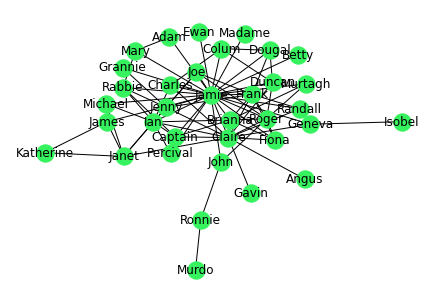

In [ ]:
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels=True, node_color='#36f25e', edge_cmap=plt.cm.Blues, pos=pos)
plt.show()

Visualization with Pyvis

In [ ]:
from pyvis.network import Network
net =Network(notebook=True, width='700px', height='500px', bgcolor ='#222222',
            font_color = '#abeb34')

#setting up a node size attribute using node degrees
node_degree=dict(G.degree)
nx.set_node_attributes(G, node_degree, 'size')
 
net.from_nx(G)
net.show('Outlander.html')

In [ ]:
#Centrality measures
#closeness centrality: measures how long it will take to spread info from one node to 
#another sequentially
#betweeness centrality: measures how often a node acts as a bridge 

In [ ]:
#checking for the most important characters using
#degree centrality
degree_dict = nx.degree_centrality(G)
degree_dict

{'Jamie': 0.7941176470588235,
 'Murtagh': 0.08823529411764705,
 'Ewan': 0.029411764705882353,
 'Claire': 0.4411764705882353,
 'Roger': 0.2647058823529412,
 'Brianna': 0.23529411764705882,
 'Captain': 0.14705882352941177,
 'Duncan': 0.14705882352941177,
 'Frank': 0.2647058823529412,
 'Dougal': 0.11764705882352941,
 'Randall': 0.08823529411764705,
 'Fiona': 0.14705882352941177,
 'Charles': 0.11764705882352941,
 'Ian': 0.3235294117647059,
 'Jenny': 0.23529411764705882,
 'James': 0.08823529411764705,
 'Rabbie': 0.14705882352941177,
 'Adam': 0.058823529411764705,
 'Mary': 0.08823529411764705,
 'Joe': 0.14705882352941177,
 'John': 0.08823529411764705,
 'Ronnie': 0.058823529411764705,
 'Colum': 0.11764705882352941,
 'Janet': 0.1764705882352941,
 'Katherine': 0.058823529411764705,
 'Michael': 0.08823529411764705,
 'Murdo': 0.029411764705882353,
 'Gavin': 0.029411764705882353,
 'Angus': 0.029411764705882353,
 'Geneva': 0.08823529411764705,
 'Isobel': 0.029411764705882353,
 'Betty': 0.0294117647

<AxesSubplot:>

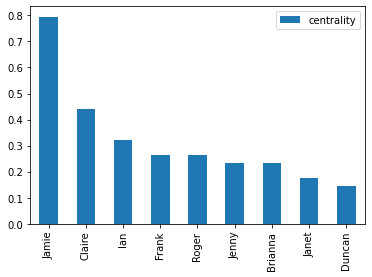

In [ ]:
degree_df = pd.DataFrame.from_dict(degree_dict, orient='index', columns=['centrality'])
degree_df.sort_values('centrality', ascending=False)[0:9].plot(kind='bar')

<AxesSubplot:>

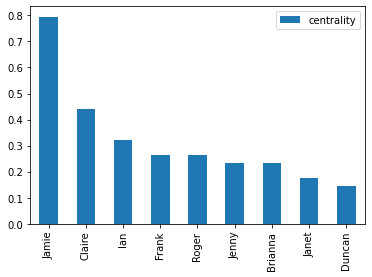

In [ ]:
#betweenness centrality
betweenness_dict = nx.betweenness_centrality(G)
betweenness_df = pd.DataFrame.from_dict(degree_dict, orient='index', columns=['centrality'])
betweenness_df.sort_values('centrality', ascending=False)[0:9].plot(kind='bar')

<AxesSubplot:>

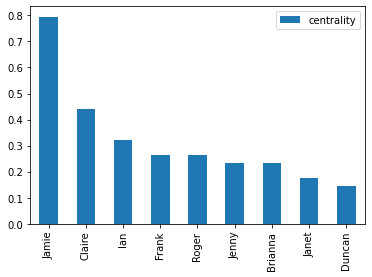

In [ ]:
#closeness centrality
closeness_dict = nx.betweenness_centrality(G)
closeness_df = pd.DataFrame.from_dict(degree_dict, orient='index', columns=['centrality'])
closeness_df.sort_values('centrality', ascending=False)[0:9].plot(kind='bar')

In [ ]:
#saving the centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')

NameError: name 'nx' is not defined

### Community Detection

In [ ]:
import community as community_louvain
communities = community_louvain.best_partition(G)
communities

AttributeError: module 'community' has no attribute 'best_partition'

In [ ]:
print(community_louvain.__doc__)

NameError: name 'community_louvain' is not defined